# Deep Learning  Project

# Importing necessary libraries 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the train dataset and split to train and validation data

In [2]:
train_data = pd.read_csv("train.csv")
x_train = train_data.drop(labels = ["label"],axis = 1)
y_train = train_data["label"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=101)


test_data = pd.read_csv("test.csv")
x_test = test_data

# Build DNN Model

In [12]:
mean = np.mean(x_train)
std = np.std(x_train)

model_dnn = tf.keras.models.Sequential([

    # Lambda layer to standardize by dividing by 255
    tf.keras.layers.Lambda(lambda x: x / 255.0, input_shape=[784]),

    # Build Deep Neural Network
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# Custom Components

In [39]:
# Custom activation: Leaky ReLU
def leaky_relu(z, alpha=0.01):
    return tf.maximum(alpha * z, z)

# Custom initializer
initializer = tf.keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')

def custom_regularizer(coeff=0.01):
    def my_reg(weight_matrix):
        return coeff * tf.reduce_sum(tf.abs(weight_matrix))
    return my_reg

# Build CNN Model

In [40]:
model_cnn = tf.keras.models.Sequential([
    # Reshape input for CNN
    tf.keras.layers.Lambda(lambda x: (x / 255.0), input_shape=[784]),
    tf.keras.layers.Reshape((28, 28, 1)),

    # convolutional layers
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=leaky_relu, kernel_regularizer=custom_regularizer(0.01)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=leaky_relu, kernel_regularizer=custom_regularizer(0.01)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),

    # Flatten for fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=leaky_relu, kernel_regularizer=custom_regularizer(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


# Compile the models

In [20]:
model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train DNN and CNN models

In [16]:
# Train the DNN model
history_dnn = model_dnn.fit(x_train, y_train, batch_size=256,epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
148/148 [==============================] - 24s 162ms/step - loss: 0.1245 - accuracy: 0.9605 - val_loss: 0.1288 - val_accuracy: 0.9633
Epoch 2/20
148/148 [==============================] - 24s 162ms/step - loss: 0.0933 - accuracy: 0.9698 - val_loss: 0.0955 - val_accuracy: 0.9710
Epoch 3/20
148/148 [==============================] - 25s 169ms/step - loss: 0.0758 - accuracy: 0.9754 - val_loss: 0.1112 - val_accuracy: 0.9667
Epoch 4/20
148/148 [==============================] - 23s 156ms/step - loss: 0.0617 - accuracy: 0.9798 - val_loss: 0.0950 - val_accuracy: 0.9736
Epoch 5/20
148/148 [==============================] - 25s 168ms/step - loss: 0.0548 - accuracy: 0.9816 - val_loss: 0.1002 - val_accuracy: 0.9726
Epoch 6/20
148/148 [==============================] - 25s 169ms/step - loss: 0.0481 - accuracy: 0.9842 - val_loss: 0.1023 - val_accuracy: 0.9740
Epoch 7/20
148/148 [==============================] - 23s 155ms/step - loss: 0.0422 - accuracy: 0.9862 - val_loss: 0.0894 - val_ac

In [22]:
# Train the CNN model
history_cnn = model_cnn.fit(x_train, y_train, batch_size=256, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
148/148 [==============================] - 319s 2s/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.0301 - val_accuracy: 0.9900
Epoch 2/2
148/148 [==============================] - 331s 2s/step - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0317 - val_accuracy: 0.9921


# Model Evaluation - Plot learning curves

### Plotting for DNN

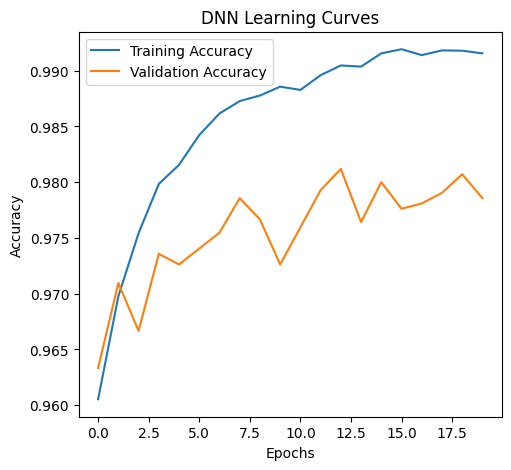

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


### Plotting for CNN

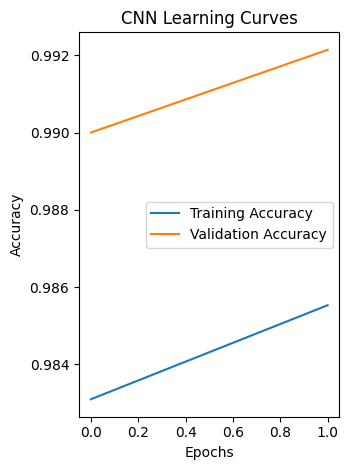

In [25]:
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluation using test data

In [36]:
dnn_pred = model_dnn.predict(x_test)
cnn_pred = model_cnn.predict(x_test)

875/875 [==============================] - 54s 62ms/step


In [34]:
dnn_pred = np.argmax(dnn_pred,axis = 1)
dnn_pred = pd.Series(dnn_pred,name="Label")
dnn_results = pd.concat([pd.Series(range(1,28001),name = "ImageId"),dnn_pred],axis = 1)
dnn_results.to_csv("dnn_results.csv",index=False)

In [ ]:
cnn_pred = np.argmax(cnn_pred,axis = 1)
cnn_pred = pd.Series(cnn_pred,name="Label")
cnn_results = pd.concat([pd.Series(range(1,28001),name = "ImageId"),cnn_pred],axis = 1)
cnn_results.to_csv("cnn_results.csv",index=False)